In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Path to your CSV file. Make sure to change this if necessary
data_path = "setosa-versicolor.csv"

# Read the CSV file
data = pd.read_csv(data_path)

In [46]:
#help(sns.regplot)

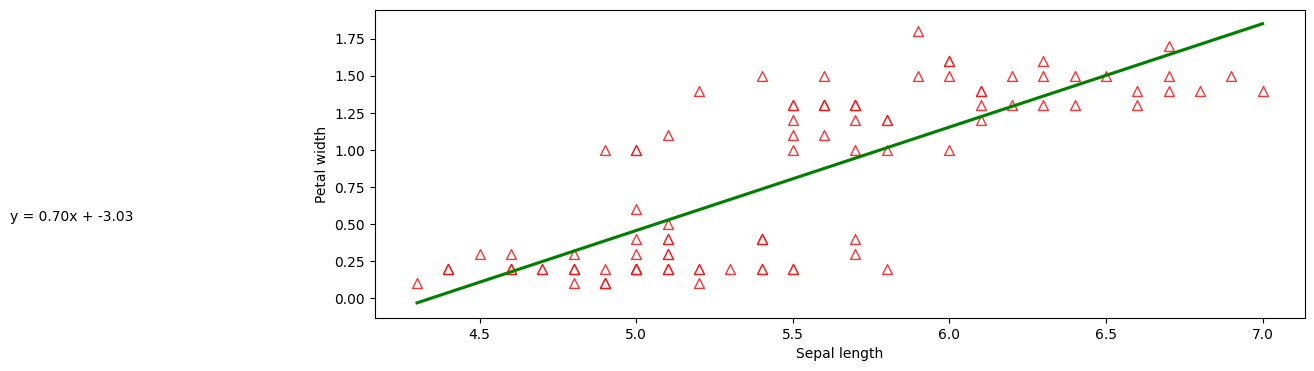

In [47]:
# Select the last 30 rows for plotting
# data_subset = data.tail(30)

# Create a scatter plot with linear regression line
sns.regplot(
    x="Sepal length",
    y="Petal width",
    data=data,
    fit_reg = True,
    order = 1,
    x_jitter= 0,
    y_jitter= 0,
    marker="^",
    scatter = True,
    scatter_kws = dict(
        edgecolor = 'r',
        facecolor = 'w',
        s = 50
    ), line_kws = dict(color = 'g', linestyle = 'solid'),
    ci = 0
)

ax = plt.gca()
fig = plt.gcf()

# Adjust the figure size
fig.set_size_inches(12, 4)

x = data["Sepal length"]
y = data["Petal width"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(3, 0.5, equation, ha='left', va='bottom')

plt.show()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
   total_bill   tip     sex smoker  day    time  size         bill_bin
0       16.99  1.01  Female     No  Sun  Dinner     2  (15.005, 26.94]
1       10.34  1.66    Male     No  Sun  Dinner     3   (3.07, 15.005]
2       21.01  3.50    Male     No  Sun  Dinner     3  (15.005, 26.94]
3       23.68  3.31    Male     No  Sun  Dinner     2  (15.005, 26.94]
4       24.59  3.61  Female     No  Sun  Dinner     4  (15.005, 26.94]


<Axes: title={'center': 'Median Bill by Gender and Weekday'}, xlabel='day', ylabel='total_bill'>

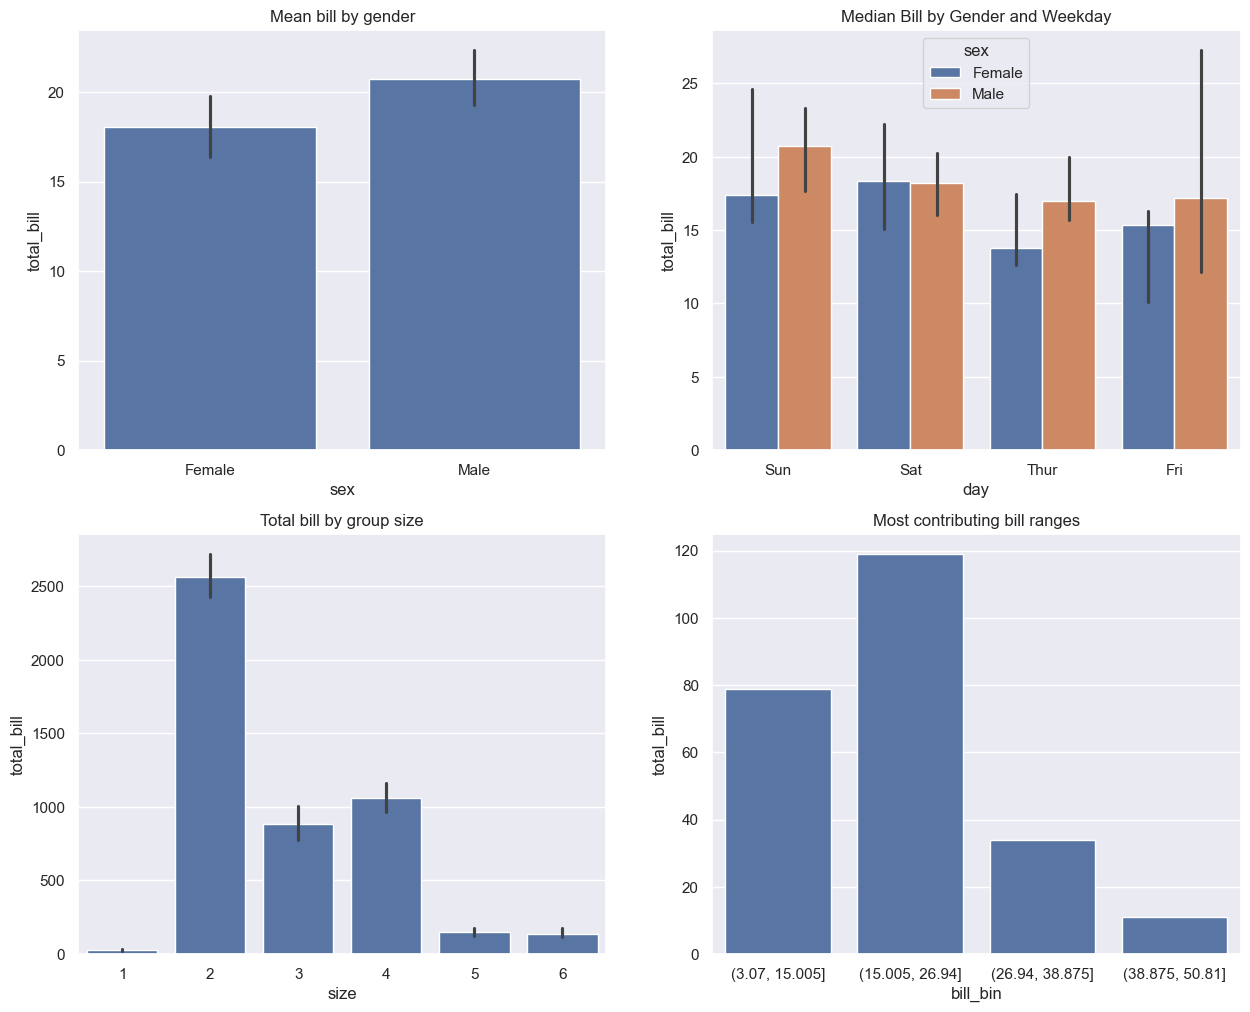

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tips = pd.read_csv("tips.csv")

# Set a darkgrid style for the plot
sns.set(style="darkgrid")

# Show the first five rows of the tips data frame
print(tips.head())

# Find the minimum and maximum total bill
min = tips['total_bill'].min()
max = tips['total_bill'].max()

# Create bins
bins = np.linspace(min, max, 5)

# Create a new column 'bill_bin' categorizing total bill into bins
tips['bill_bin'] = pd.cut(tips.total_bill, bins).astype('category')

# Show the first five rows after creating the new column
print(tips.head())

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Create a bar plot for mean bill by gender
sns.barplot(
    x = "sex",
    y = "total_bill",
    data = tips,
    ax = axes[0, 0],
    estimator = np.mean
)

# Set title for the first plot
axes[0, 0].set_title('Mean bill by gender')

# Create a bar plot for total bill by group size
sns.barplot(
    x = "size",
    y = "total_bill",
    data = tips,
    ax = axes[1, 0],
    estimator = np.sum
)

# Set title for the second plot
axes[1, 0].set_title('Total bill by group size')

# Create a bar plot for bill bins
sns.barplot(
    x = "bill_bin",
    y = "total_bill",
    data = tips,
    ax = axes[1, 1],
    estimator = np.size
)

# Set title for the third plot
axes[1, 1].set_title('Most contributing bill ranges')

# Set title for the new plot
axes[0, 1].set_title('Median Bill by Gender and Weekday')

# Create a bar plot for median bill by gender weekday
sns.barplot(
    x = "day",
    y = "total_bill",
    hue = "sex",
    data = tips,
    ax = axes[0, 1],
    estimator = np.median
)

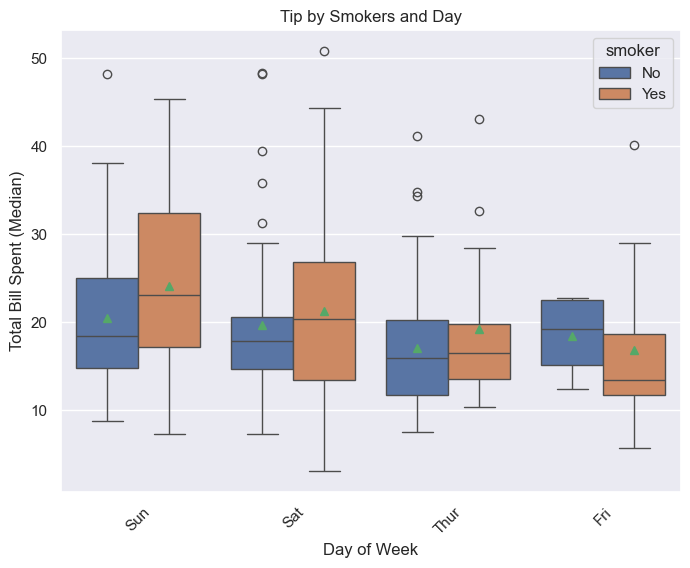

In [61]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tips = pd.read_csv("tips.csv")

# Create a figure with a single subplot
plt.figure(figsize=(8, 6))

# Boxplot for median tip by sex and day
sns.boxplot(
    x = "day",
    y = "total_bill",
    hue = "smoker",
    showmeans=True,  # Show mean values as well
    data = tips
)

# Set title and labels
plt.xlabel('Day of Week')
plt.ylabel('Total Bill Spent (Median)')
plt.title('Tip by Smokers and Day')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='sex', ylabel='total_bill'>

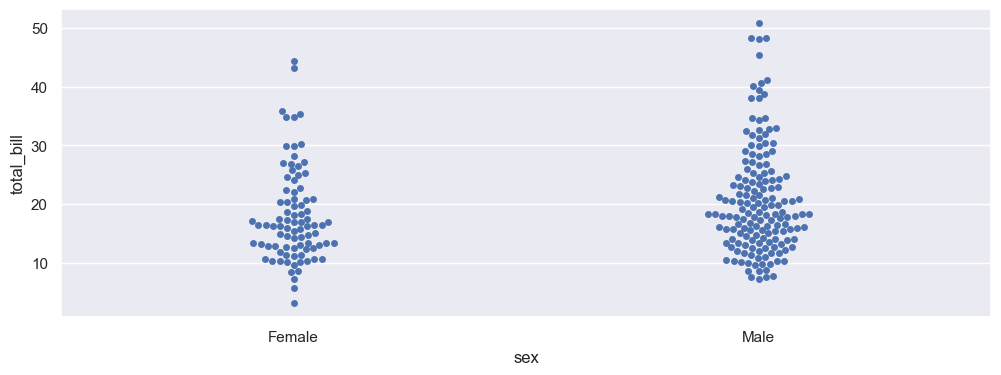

In [62]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

d = pd.read_csv("iris.csv")
fig, ax = plt.subplots(figsize = (12, 4))
sns.swarmplot(x = 'Type', y = 'Sepal length', data = d, ax = ax, dodge = True)

/tmp/ipykernel_7079/287151656.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.swarmplot(x = 'time', y = 'total_bill', hue = 'sex', data = d, ax = g.ax, dodge = True, color = "purple")


<Axes: xlabel='time', ylabel='total_bill'>

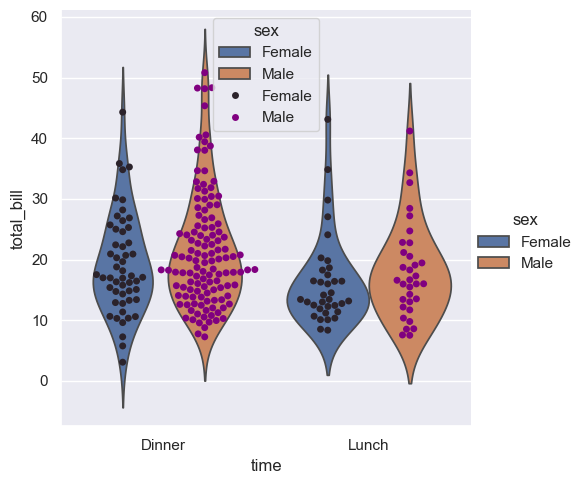

In [68]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

d = pd.read_csv("tips.csv")
g = sns.catplot(x ='time', y = 'total_bill', hue = 'sex', data = d, kind = "violin", inner = None)
sns.swarmplot(x = 'time', y = 'total_bill', hue = 'sex', data = d, ax = g.ax, dodge = True, color = "purple")